<a href="https://colab.research.google.com/github/aolivieri/colon/blob/master/colon_colonoscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/aolivieri/colon.git

Cloning into 'colon'...
remote: Enumerating objects: 13573, done.
remote: Total 13573 (delta 0), reused 0 (delta 0), pack-reused 13573
Receiving objects: 100% (13573/13573), 2.05 GiB | 40.72 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Checking out files: 100% (14004/14004), done.


In [2]:
!ls 

colon  sample_data


In [31]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.regularizers import l2
tf.__version__

'2.2.0'

In [4]:
import tensorflow.keras.backend as K

In [6]:
# K.clear_session()

In [60]:
# Part 1 - Data Preprocessing

# Generating images for the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the Training set
training_set = train_datagen.flow_from_directory('./colon/Kvasir/training_set', 
                                                 target_size = (224, 224))

# Creating the Test set
test_set = test_datagen.flow_from_directory('./colon/Kvasir/test_set',
                                            target_size = (224, 224))

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [61]:
a, b = training_set.next()
a.shape, b.shape

((32, 224, 224, 3), (32, 8))

In [62]:
from PIL import Image
import numpy as np

[0. 0. 1. 0. 0. 0. 0. 0.]


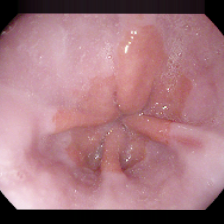

In [63]:
print(b[0])
Image.fromarray(np.uint8(255 * a[0]))

[0. 0. 0. 0. 0. 1. 0. 0.]


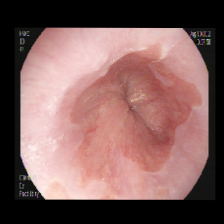

In [64]:
print(b[2])
Image.fromarray(np.uint8(255 * a[2]))

In [65]:
# Transfer Learning

from tensorflow.keras.models import *

pretrained_vgg16 = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# Freeze all layers
for l in pretrained_vgg16.layers:
  l.trainable = False

global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()(pretrained_vgg16.output)
fc1 = tf.keras.layers.Dense(512, activation='relu')(global_avg_pool)
fc2 = tf.keras.layers.Dense(512, activation='relu')(fc1)
output = tf.keras.layers.Dense(8, activation='softmax')(fc2)

model = Model(pretrained_vgg16.input, output)

In [66]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [67]:
# Training the CNN on the Training set and evaluating it on the Test set
hist = model.fit_generator(training_set,
                  steps_per_epoch = training_set.__len__(),
                  epochs = 10,
                  validation_data = test_set,
                  validation_steps = test_set.__len__())

Epoch 1/10
100/100 [==============================] - 95s 950ms/step - loss: 1.3982 - accuracy: 0.4563 - val_loss: 0.8415 - val_accuracy: 0.6600
Epoch 2/10
100/100 [==============================] - 94s 937ms/step - loss: 0.7889 - accuracy: 0.6753 - val_loss: 0.6706 - val_accuracy: 0.7063
Epoch 3/10
100/100 [==============================] - 93s 933ms/step - loss: 0.6600 - accuracy: 0.7309 - val_loss: 0.6659 - val_accuracy: 0.7425
Epoch 4/10
100/100 [==============================] - 94s 938ms/step - loss: 0.5923 - accuracy: 0.7544 - val_loss: 0.5113 - val_accuracy: 0.8012
Epoch 5/10
100/100 [==============================] - 94s 937ms/step - loss: 0.5732 - accuracy: 0.7653 - val_loss: 0.5063 - val_accuracy: 0.7937
Epoch 6/10
100/100 [==============================] - 93s 927ms/step - loss: 0.5290 - accuracy: 0.7819 - val_loss: 0.4983 - val_accuracy: 0.8087
Epoch 7/10
100/100 [==============================] - 93s 933ms/step - loss: 0.5111 - accuracy: 0.7862 - val_loss: 0.5055 - val_ac

In [27]:
model.save('colon2.h5')

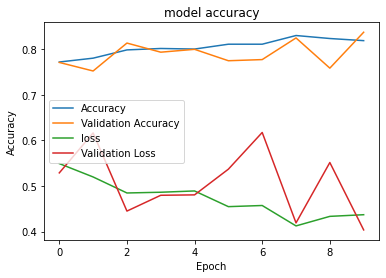

In [26]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

[[6.6165954e-35]]


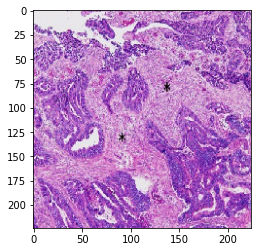

In [ ]:
from keras.preprocessing import image
import numpy as np
#img = image.load_img("./ml-datasets/colon_image_sets/test_set/colon_aca/colonca4001.jpeg",target_size=(224,224))
#img = image.load_img("./ml-datasets/colon_image_sets/test_set/colon_n/colonn4001.jpeg",target_size=(224,224))
img = image.load_img("./colon1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from tensorflow.keras.models import load_model
saved_model = load_model("colon.h5")
output = saved_model.predict(img)
print(output)